In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [8]:
subs=['sub-300', 'sub-304', 'sub-293', 'sub-273', 'sub-265', 'sub-307', 'sub-283', 'sub-275', 
'sub-291', 'sub-297', 'sub-303', 'sub-294', 'sub-286', 'sub-282', 'sub-310', 'sub-302', 'sub-312', 
'sub-301', 'sub-287', 'sub-298', 'sub-313', 'sub-285', 'sub-292', 'sub-311', 'sub-267', 'sub-295', 
'sub-305', 'sub-274', 'sub-290', 'sub-288', 'sub-281', 'sub-276', 'sub-277', 'sub-299', 'sub-308',
 'sub-272', 'sub-284', 'sub-289', 'sub-280', 'sub-309', 'sub-306', 'sub-296', 'sub-127', 'sub-279', 
 'sub-315', 'sub-314']
subs=['sub-145', 'sub-143', 'sub-016', 'sub-142', 'sub-141', 'sub-133', 'sub-140', 'sub-136', 
'sub-084', 'sub-135', 'sub-137', 'sub-138', 'sub-111', 'sub-106', 'sub-134', 'sub-132', 'sub-144']

In [14]:
np.load('/jukebox/griffiths/bert-brains/results/slumlordreach/encoding-layer_0_activations/sub-145_regularization_coef.npy',allow_pickle=True).astype('float')

array([[1.e+23, 1.e+21, 1.e+21],
       [1.e-21, 1.e+05, 1.e+19],
       [1.e+23, 1.e+05, 1.e+23],
       ...,
       [1.e+17, 1.e+23, 1.e+23],
       [1.e+21, 1.e+01, 1.e+23],
       [1.e+05, 1.e+03, 1.e+01]])

In [16]:
def get_results(name):
    results_dir='/jukebox/griffiths/bert-brains/results/slumlordreach/'
    results=[]
    for lnum in range(13):
        results_layer=[]
        for sub_idx,sub in enumerate(subs):
            fname=results_dir+"encoding-layer_"+str(lnum)+"_activations/"+sub+"_"+name+".npy"
            #print(fname)
            results_layer.append(np.load(fname,allow_pickle=True).astype('float'))
        results.append(np.asarray(results_layer))
    results=np.asarray(results)
    return results
results_alphas=get_results('regularization_coef')
results_performance=get_results('parcelwise_results')


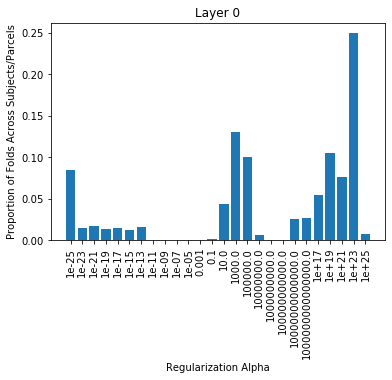

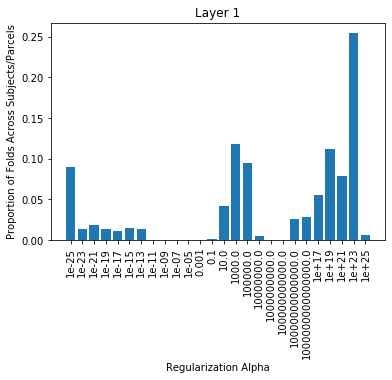

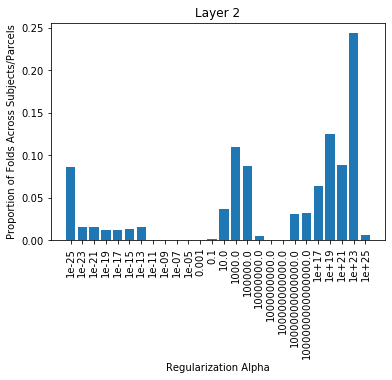

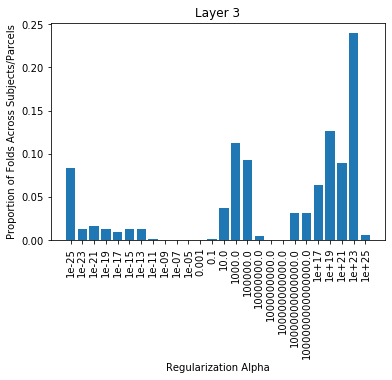

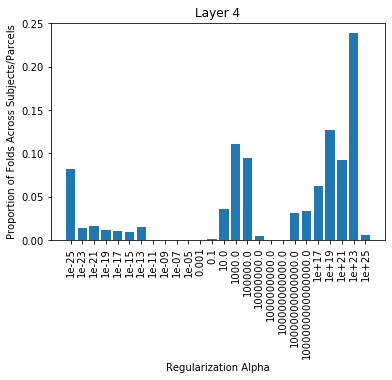

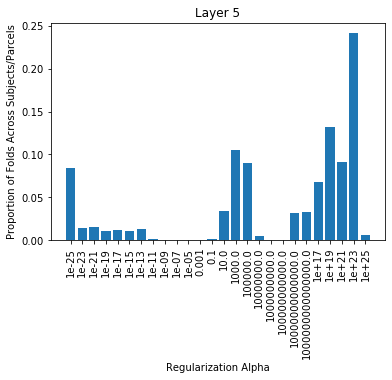

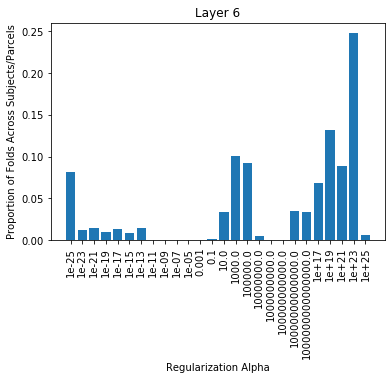

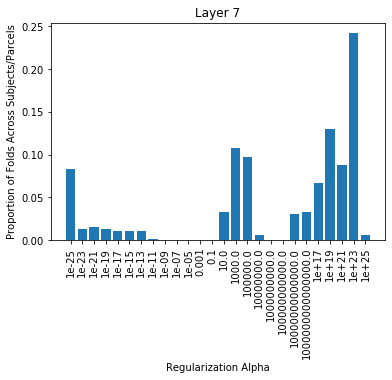

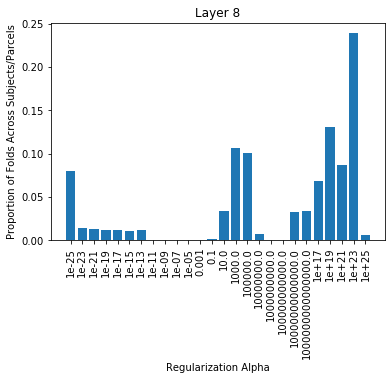

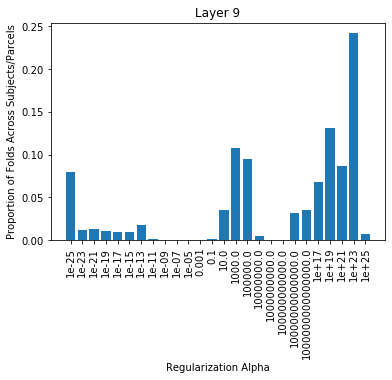

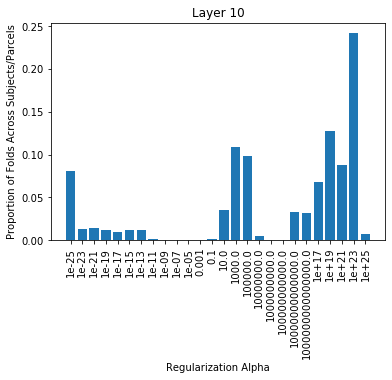

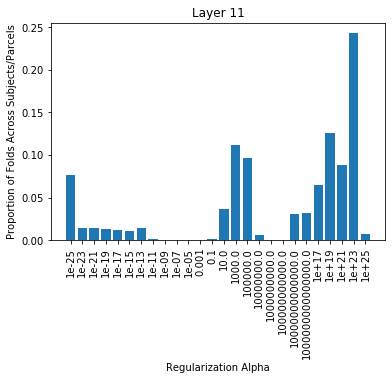

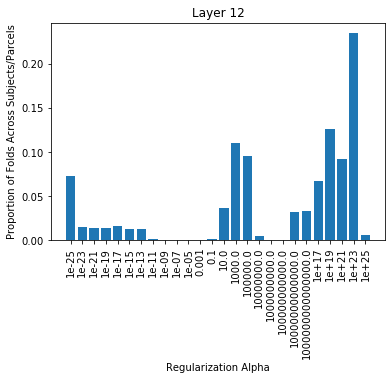

In [17]:
#Proportion of folds in which that regularization value was picked. 
results=np.reshape(results_alphas,(13,-1))
exponents=list(range(-25,26,2))
alphas=[10**e for e in exponents]
alphas=np.asarray(alphas).astype('float')
for i in range(13):
    counts=results[i]
    bars=np.zeros(len(alphas))
    for a_idx,a in enumerate(alphas):
        bars[a_idx]=np.sum(counts==a)/np.prod(counts.shape)
    plt.figure()
    plt.bar(list(range(len(alphas))),bars)
    plt.xticks(list(range(len(alphas))),alphas,rotation=90)
    plt.xlabel("Regularization Alpha")
    plt.ylabel("Proportion of Folds Across Subjects/Parcels")
    plt.title("Layer "+str(i))

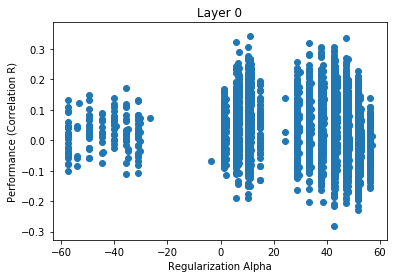

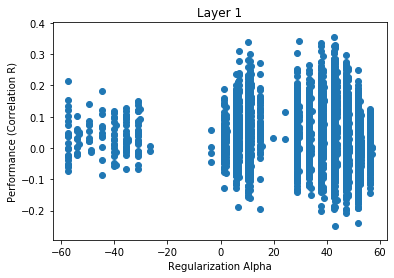

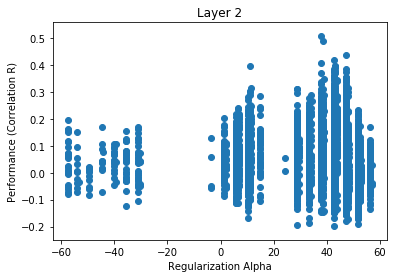

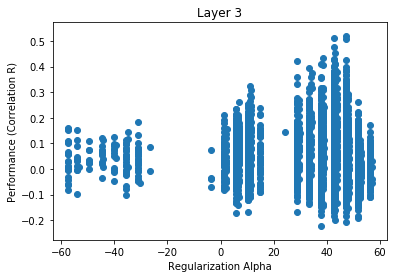

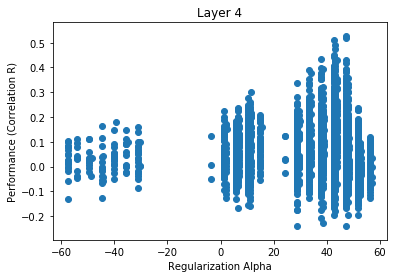

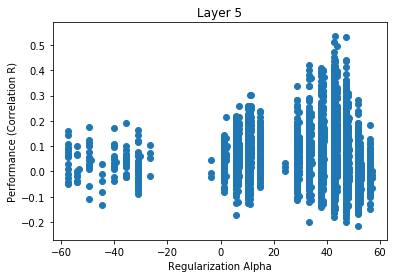

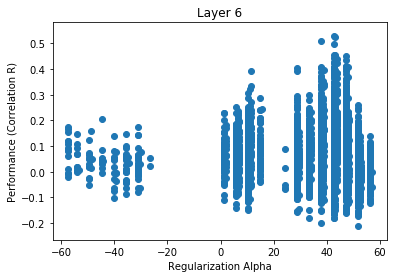

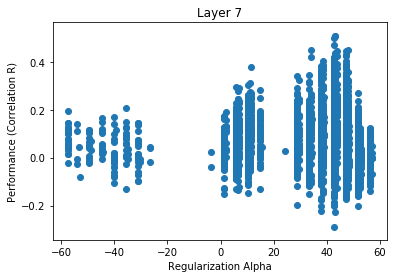

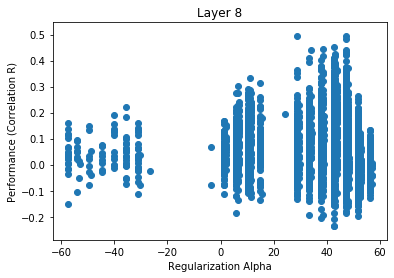

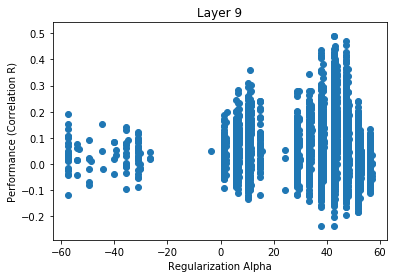

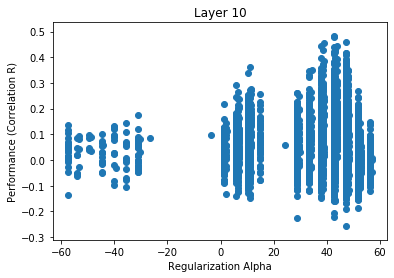

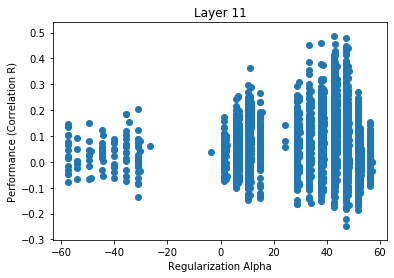

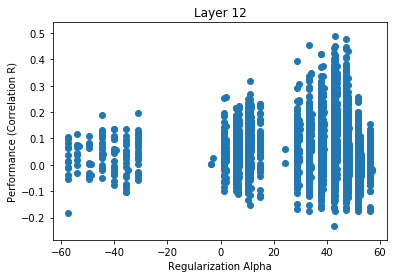

In [18]:
#Regularization vs fold performance scatterplot: no correlation between the two. 
results=results_alphas.mean(axis=3).reshape((13,-1))
results2=np.reshape(results_performance,(13,-1))
#alphas=[1e-25,1e-20,1e-10,1e-6,1e-3,1e-1,1,10,100,1000,1e5,1e7,1e10,1e21,1e23,1e24,1e25]
for i in range(13):
    counts=results[i]
    r_values=results2[i]
    r_values[np.isnan(r_values)]=0.0
    plt.figure()
    plt.ylabel("Performance (Correlation R)")
    plt.xlabel("Regularization Alpha")
    plt.scatter(np.log(counts),r_values)
    plt.title("Layer "+str(i))

In [19]:
results_alphas.shape

(13, 17, 1000, 3)

In [9]:
results_performance.shape

(13, 46, 1000)